## Using Numpy

In [3]:
import numpy

## Using SKLearn

In [4]:
import sklearn

## Building Decision Tree

## Numpy

In [11]:
a = [1,2,3,4,5] # list
b = {'a':1, 'b':2} # dictionary
c = (1,2,3) # tuple


In [13]:
a.append('Hello World')

In [14]:
a

[1, 2, 3, 4, 5, 'Hello World']

In [15]:
a = [1,2,3] 
b = [2,3,4]


In [19]:
for i in range(0,len(a)):
     print(a[i] * b[i])

2
6
12


In [21]:
import numpy 
# 1. all the data are in same type
# 2. you cannot modify the numpy array:e.g. append
na = numpy.array(a)
nb = numpy.array(b)
na
nb

array([2, 3, 4])

In [25]:
na * nb
na + nb
na - nb
na / nb

array([0.5       , 0.66666667, 0.75      ])

### 利用 load_iris 將資料存放到 iris 物件中

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()

In [9]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [26]:
iris.data.shape

(150, 4)

In [28]:
len(iris.target)

150

### 建立決策樹模型

In [29]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [30]:
?DecisionTreeClassifier

In [31]:
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
test_data = numpy.array([[5, 4, 3, 2]])

In [35]:
clf.predict(test_data)

array([1])

In [36]:
clf.predict(iris.data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 繪製模型

In [39]:
from sklearn import tree
tree.export_graphviz(clf, out_file='tree.dot')

### 建立兩層決策樹

In [44]:
from sklearn.tree import DecisionTreeClassifier
X = iris.data[:,[2,3]]
y =  iris.target

clf = DecisionTreeClassifier(max_depth=2)

clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [45]:
from sklearn import tree
tree.export_graphviz(clf, out_file='tree2.dot')

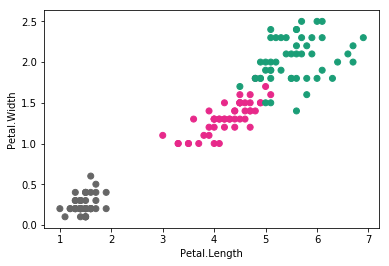

In [53]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, cmap = plt.cm.Dark2_r)
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.show()


In [56]:
import numpy as np
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
np.arange(y_min, y_max, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z

array([0, 0, 0, ..., 2, 2, 2])

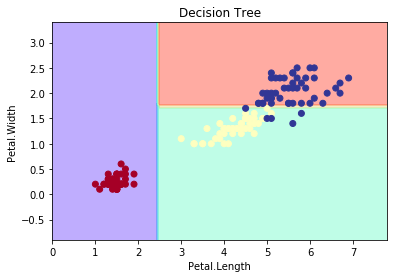

In [57]:
plt.plot()
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.rainbow)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, cmap = plt.cm.RdYlBu)
plt.title('Decision Tree')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.show()


In [59]:
predicted = clf.predict(X)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [63]:
sum(predicted == iris.target) / len(iris.target)

0.96

In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix(iris.target, predicted)

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]], dtype=int64)

## Module

### Method 1

In [65]:
from test.qoo import a

In [66]:
a.hello()

hello world


In [67]:
a = 123

In [68]:
a.hello()

AttributeError: 'int' object has no attribute 'hello'

In [69]:
import test
test.qoo.a.hello()

hello world


## Sigmoid Function

In [70]:
np.exp(1)

2.718281828459045

In [71]:
import numpy as np

def sigmoid_function(x):
    return 1/ (1 + np.exp(-x))

x = np.array([-100,100,2])
sigmoid_function(x)


array([3.72007598e-44, 1.00000000e+00, 8.80797078e-01])

## 邏輯回歸分析模型

In [86]:
from sklearn.datasets import load_iris
iris = load_iris()

In [87]:
X = iris.data[:,[2,3]]
y = iris.target

In [88]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [89]:
predicted = clf.predict(X)

In [90]:
sum(predicted == y) / len(y)

0.8733333333333333

In [91]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, predicted)

array([[50,  0,  0],
       [ 0, 35, 15],
       [ 0,  4, 46]], dtype=int64)

In [95]:
import numpy as np
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
np.arange(y_min, y_max, 0.1))

In [99]:
xx.shape

(44, 79)

In [102]:
np.c_[xx.ravel(), yy.ravel()].shape

(3476, 2)

In [103]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z.shape

(3476,)

In [ ]:
np.arange(y_min, y_max, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z

In [104]:
xx.shape

(44, 79)

In [105]:
Z.shape

(3476,)

In [106]:
a = Z.reshape(xx.shape)
a.shape

(44, 79)

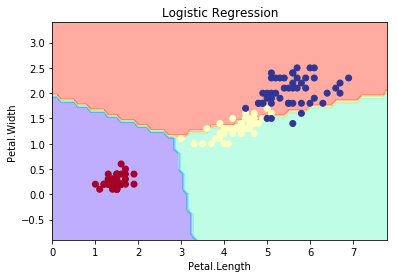

In [93]:
plt.plot()
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.rainbow)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, cmap = plt.cm.RdYlBu)
plt.title('Logistic Regression')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.show()


## 類神經網路

### Threshold Function

In [107]:
a = numpy.array(3)

In [109]:
a > 0

True

In [111]:
(a > 0).astype(int)

1

In [110]:
a < 0

False

In [112]:
(a < 0).astype(int)

0

In [113]:
def threshold_function(x):
    y = x > 0
    return y.astype(int)

x=np.array([-1,1,2])
threshold_function(x)

array([0, 1, 1])

In [116]:
def sigmoid_function(x):
    return 1/ (1 + np.exp(-x))

x = np.array([-100,1000,2])
sigmoid_function(x)

array([3.72007598e-44, 1.00000000e+00, 8.80797078e-01])

In [117]:
def tangent_function(x):
    return (1 - np.exp(-2*x)) / (1 + np.exp(-2*x))

x = np.array([-1,1,2])
tangent_function(x)

array([-0.76159416,  0.76159416,  0.96402758])

In [118]:
x = np.array([-100,1000,2])
tangent_function(x)

array([-1.        ,  1.        ,  0.96402758])

In [119]:
np.tanh(x)

array([-1.        ,  1.        ,  0.96402758])

In [120]:
def relu_function(x):
    return np.maximum(0,x)

x = np.array([-1,1,2])
relu_function(x)

array([0, 1, 2])

### 單層神經網路前向傳播過程

In [121]:
import numpy as np
X = np.array([1,2])
W = np.array([[1,3,5],[2,4,6]])


In [122]:
X.shape

(2,)

In [123]:
W.shape

(2, 3)

In [ ]:
# 1 * 1 + 2 * 2
# 1 * 3 + 2 * 4
# 1 * 5 + 2 * 6

In [124]:
X.dot(W)

array([ 5, 11, 17])

### 兩層神經網路前向傳播過程

In [125]:
network = {}
network['w1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
network['w2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])

In [127]:
x = np.array([1,0.5])
a = np.dot(x, network['w1']) 
z = sigmoid_function(a)
y = np.dot(z, network['w2'])
y

array([0.38646761, 0.94514795])

In [131]:
network = {}
network['w1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
network['b1'] = np.array([0.1,0.2,0.3])
network['w2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
network['b2'] = np.array([0.1,0.2])


In [134]:
x = np.array([1,0.5])
a = np.dot(x, network['w1'])  + network['b1']
z = sigmoid_function(a)
y = np.dot(z, network['w2']) + network['b2']
y

array([0.51615984, 1.21402696])

In [135]:
def softmax_function(x):
    return np.exp(x) / np.sum(np.exp(x))

softmax_function(y)

array([0.33228528, 0.66771472])

## 神經網路學習過程

### 均方誤差 Mean squared error

In [137]:
def mean_squared_err(y_hat, y):
    return 0.5 * np.sum((y_hat - y) ** 2)

mean_squared_err(softmax_function(y), np.array([0,1]))

0.11041351040400738

In [138]:
np.log(0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


-inf

In [139]:
def cross_entropy_err(y_hat, y):
    delta = 1e-8
    return -np.sum(y*np.log(y_hat + delta))

### 求偏微分

In [140]:
def func(x):
    return x ** 2

In [141]:
func(3)

9

In [142]:
def dfunc(f, x):
    h = 1e-4
    return (f(x+h) - f(x)) / (h)

In [143]:
dfunc(func, 3)

6.000100000012054

In [144]:
def dfunc(f, x):
    h = 1e-32
    return (f(x+h) - f(x)) / (h)

In [145]:
dfunc(func, 3)

0.0

In [147]:
np.array(3) + np.array(1e-4)

3.0001

In [148]:
np.array(3) + np.array(1e-32)

3.0

In [152]:
np.array(3).dtype

dtype('int32')

### 利用微分求出切線

In [162]:
def dfunc(f, x):
    h = 1e-4
    return (f(x+h) - f(x)) / (h)

In [163]:
x = np.arange(-6,6, 0.01)
x

array([-6.  , -5.99, -5.98, ...,  5.97,  5.98,  5.99])

In [164]:
y= func(x)
y

array([36.    , 35.8801, 35.7604, ..., 35.6409, 35.7604, 35.8801])

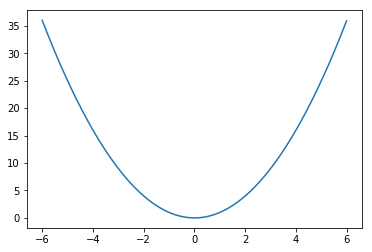

In [165]:
plt.plot(x,y)


In [166]:
def tfunc(f, x, t):
    d= dfunc(f,x)
    y= f(x)-d*x
    return d * t + y

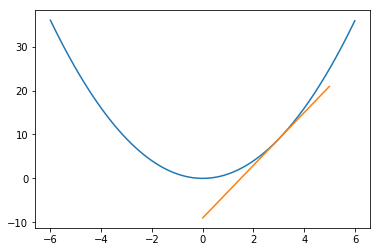

In [167]:
x = np.arange(-6,6, 0.01)
y= func(x)
plt.plot(x,y)
x2= np.arange(0,5, 0.01)
y2= tfunc(func, 3, x2)
plt.plot(x2, y2)


### 中央差分

In [168]:
def dfunc(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [169]:
def tfunc(f, x, t):
    d= dfunc(f,x)
    y= f(x)-d*x
    return d * t + y

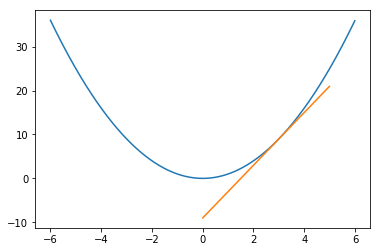

In [170]:
x = np.arange(-6,6, 0.01)
y= func(x)
plt.plot(x,y)
x2= np.arange(0,5, 0.01)
y2= tfunc(func, 3, x2)
plt.plot(x2, y2)


In [173]:
def dfunc (f,x):
    h=1e-4
    grad =np.zeros_like(x)
    it =np.nditer(x,flags =[ 'multi_index'])
    while not it.finished :
        idx     =it.multi_index
        tmp_val =x[idx]
        x[idx]  =float(tmp_val)+h
        fxh1    =f(x)# f(x+h) 
        x[idx]  =tmp_val -h
        fxh2    = f(x)# f(x-h) 
        grad[idx]=(fxh1 -fxh2 )/(2*h)
        x[idx]=tmp_val
        it.iternext()
    return grad


In [181]:
m= np.array([[1.0,2.0,3.0],[2.0,3.0,4.0]])
m
#dfunc(func, np.array([[1.0,2.0,3.0],[2.0,3.0,4.0]]))

array([[1., 2., 3.],
       [2., 3., 4.]])

In [ ]:
np.zeros_like(m)

In [184]:
def dfunc(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [185]:
def gradient_descent(func, init_x, lr = 0.3, epochs = 100):
    x = init_x
    res = [x]
    for i in range(epochs):
        grad = dfunc(func,x)
        x = x - grad * lr
        res.append(x)
    return np.array(res)

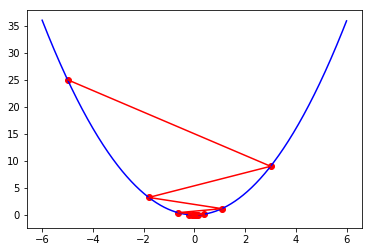

In [187]:
x = gradient_descent(func, -5, lr=0.8)
t = np.arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c='r')
plt.scatter(x, func(x), c='r')
plt.show()

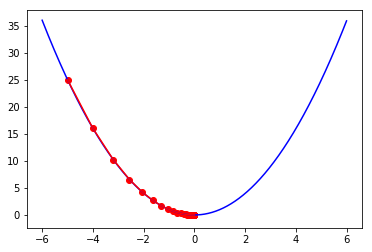

In [188]:
x = gradient_descent(func, -5, lr=0.1)
t = np.arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c='r')
plt.scatter(x, func(x), c='r')
plt.show()

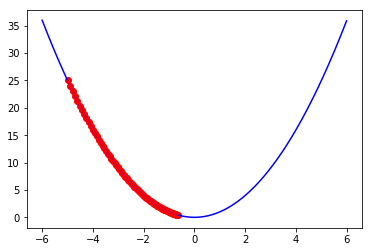

In [189]:
x = gradient_descent(func, -5, lr=0.01)
t = np.arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c='r')
plt.scatter(x, func(x), c='r')
plt.show()

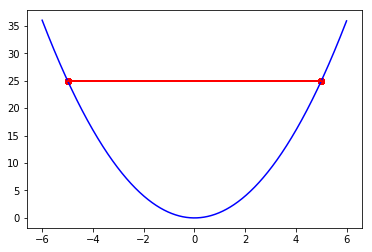

In [190]:
x = gradient_descent(func, -5, lr=1)
t = np.arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c='r')
plt.scatter(x, func(x), c='r')
plt.show()

In [191]:
x=np.array([ 0.6 ,0.9 ])
np.random.seed (42 )
weight=np.random.randn(2,3)
z=np.dot(x,weight)

In [193]:
x.shape

(2,)

In [194]:
weight.shape

(2, 3)

In [192]:
z

array([ 1.66875536, -0.29369662,  0.17788986])

In [196]:
y_hat= softmax_function(z)

In [197]:
y_hat

array([0.73222998, 0.10288817, 0.16488185])

In [198]:
y = np.array([0,0,1])

In [199]:
cross_entropy_err(y_hat,y)

1.8025260716416405

In [200]:
def dfunc (f,x):
    h=1e-4
    grad =np.zeros_like(x)
    it =np.nditer(x,flags =[ 'multi_index'])
    while not it.finished :
        idx     =it.multi_index
        tmp_val =x[idx]
        x[idx]  =float(tmp_val)+h
        fxh1    =f(x)# f(x+h) 
        x[idx]  =tmp_val -h
        fxh2    = f(x)# f(x-h) 
        grad[idx]=(fxh1 -fxh2 )/(2*h)
        x[idx]=tmp_val
        it.iternext()
    return grad


In [201]:
def predict(x):
    return np.dot(x, weight)

In [202]:
def loss(x,y):
    z= predict(x)
    y_hat= softmax_function(z)
    loss= cross_entropy_err(y_hat,y)
    return loss


In [203]:
func= lambda w: loss(x,y)

dfunc(func, weight)

array([[ 0.43933796,  0.0617329 , -0.50107086],
       [ 0.65900694,  0.09259935, -0.75160629]])

## 訓練神經網路

In [204]:
import numpy as np

def softmax_function(x):
    return np.exp(x) / np.sum(np.exp(x))

def sigmoid_function(x):
    return 1/ (1 + np.exp(-x))

def dfunc(f, x):
    h = 1e-4 
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'])
    while not it.finished:     
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        it.iternext()   
    return grad

def cross_entropy_err(y_hat, y):
    delta = 1e-8
    return -np.sum(y*np.log(y_hat + delta))


class ANN:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid_function(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax_function(a2)
        return y
        
    def loss(self, x, y):
        y_hat = self.predict(x)
        return cross_entropy_err(y_hat, y)
        
    def numerical_gradient(self, x, y):
        loss_W = lambda W: self.loss(x, y)
        grads = {}
        grads['W1'] = dfunc(loss_W, self.params['W1'])
        grads['b1'] = dfunc(loss_W, self.params['b1'])
        grads['W2'] = dfunc(loss_W, self.params['W2'])
        grads['b2'] = dfunc(loss_W, self.params['b2'])
        return grads

In [205]:
net = ANN(input_size=4, hidden_size=5, output_size=3)

In [212]:
x= iris.data


In [213]:
iris.target
# 0 => [1,0,0]
# 1 => [0,1,0]
# 2 => [0,0,1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [214]:
y = np.zeros((len(iris.target), 3))
for idx, val in enumerate(iris.target):
    y[idx, val] = 1


In [216]:
#y

In [217]:
epochs = 3000
lr = 0.01
train_loss = []
for i in range(epochs):
    grad = net.numerical_gradient(x,y)
    for key in ('W1', 'b1', 'W2', 'b2'):
        net.params[key] = net.params[key] - lr * grad[key]
    loss = net.loss(x, y)
    train_loss.append(loss)

Text(0.5,1,'Training Loss')

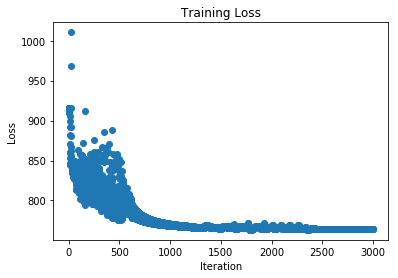

In [218]:
plt.scatter(range(0,3000),train_loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')

In [221]:
#net.predict(x)

In [220]:
from sklearn.metrics import accuracy_score, confusion_matrix
predicted = np.argmax(net.predict(x), axis=1)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [223]:
# accuracy
accuracy_score(iris.target, predicted)

0.98

In [224]:
# confusion matrix
confusion_matrix(iris.target, predicted)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  0, 50]], dtype=int64)